In [ ]:
#Importing Liabraries
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/cities (1).csv')

In [ ]:
df.head()

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,average,date
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748-06-01
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748-07-01
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748-08-01
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748-09-01
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748-10-01


In [ ]:
df.to_html('cities.html')

In [ ]:
df.dtypes

LatD         int64
LatM         int64
LatS         int64
NS          object
LonD         int64
LonM         int64
LonS         int64
EW          object
City        object
State       object
average    float64
date        object
dtype: object

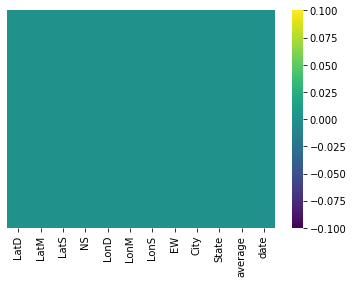

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
df.isnull().sum()

LatD       0
LatM       0
LatS       0
NS         0
LonD       0
LonM       0
LonS       0
EW         0
City       0
State      0
average    0
date       0
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.shape

(128, 12)

In [ ]:
df.rename(columns={'LatD':'Latitude in Degree','LatM':'Latitude in minute','LatS':'Latitude in Second','LonD':'Longitude in Degree','LonM':'Longitude in Minute','LonS':'Longitude in Second','NS':'North-South','EW':'East-West','average':'Average'},inplace=True)
df.head()

,Latitude in Degree,Latitude in minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,date
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748-06-01
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748-07-01
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748-08-01
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748-09-01
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748-10-01


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['1748-06-01', '1748-07-01', '1748-08-01', '1748-09-01',
               '1748-10-01', '1748-11-01', '1748-12-01', '1749-01-01',
               '1749-02-01', '1749-03-01',
               ...
               '1758-04-01', '1758-05-01', '1758-06-01', '1758-07-01',
               '1758-08-01', '1758-09-01', '1758-10-01', '1758-11-01',
               '1758-12-01', '1759-01-01'],
              dtype='datetime64[ns]', name='date', length=128, freq=None)

In [ ]:
df.describe()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.820312,30.765625,27.492188,93.250000,27.742188,26.960938,40.641785
std,5.200596,16.426158,18.977814,15.466499,16.927937,18.727807,1.834970
min,26.000000,1.000000,0.000000,71.000000,0.000000,0.000000,31.500000
25%,35.000000,16.000000,11.000000,80.000000,14.000000,11.000000,40.579828
50%,39.000000,31.000000,24.000000,89.500000,26.500000,23.500000,40.581119
75%,42.250000,45.000000,47.000000,103.250000,40.250000,47.000000,40.582258
max,50.000000,59.000000,59.000000,123.000000,58.000000,59.000000,54.333333


In [ ]:
df['year'] = df.index.year
df.head()

,Latitude in Degree,Latitude in minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,year
date,,,,,,,,,,,,
1748-06-01,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748
1748-07-01,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748
1748-08-01,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748
1748-09-01,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748
1748-10-01,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748


In [ ]:
x=df[['Latitude in Degree','Latitude in minute','Latitude in Second','Longitude in Degree','Longitude in Minute','Longitude in Second']]
y=df.Average

In [ ]:
x

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,41,5,59,80,39,0
1748-07-01,42,52,48,97,23,23
1748-08-01,46,35,59,120,30,36
1748-09-01,42,16,12,71,48,0
1748-10-01,43,37,48,89,46,11
...,...,...,...,...,...,...
1758-09-01,39,31,12,119,48,35
1758-10-01,50,25,11,104,39,0
1758-11-01,40,10,48,122,14,23


In [ ]:
y

date
1748-06-01    37.333333
1748-07-01    47.500000
1748-08-01    54.333333
1748-09-01    31.500000
1748-10-01    45.666667
                ...    
1758-09-01    40.581091
1758-10-01    40.581095
1758-11-01    40.581100
1758-12-01    40.581105
1759-01-01    40.581110
Name: Average, Length: 128, dtype: float64

In [ ]:
y.isnull()

date
1748-06-01    False
1748-07-01    False
1748-08-01    False
1748-09-01    False
1748-10-01    False
              ...  
1758-09-01    False
1758-10-01    False
1758-11-01    False
1758-12-01    False
1759-01-01    False
Name: Average, Length: 128, dtype: bool

In [ ]:
x.isnull()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,False,False,False,False,False,False
1748-07-01,False,False,False,False,False,False
1748-08-01,False,False,False,False,False,False
1748-09-01,False,False,False,False,False,False
1748-10-01,False,False,False,False,False,False
...,...,...,...,...,...,...
1758-09-01,False,False,False,False,False,False
1758-10-01,False,False,False,False,False,False
1758-11-01,False,False,False,False,False,False


In [ ]:
df2 = df.drop(["City","State","North-South","East-West"],axis=1)
df2=df2.reset_index()

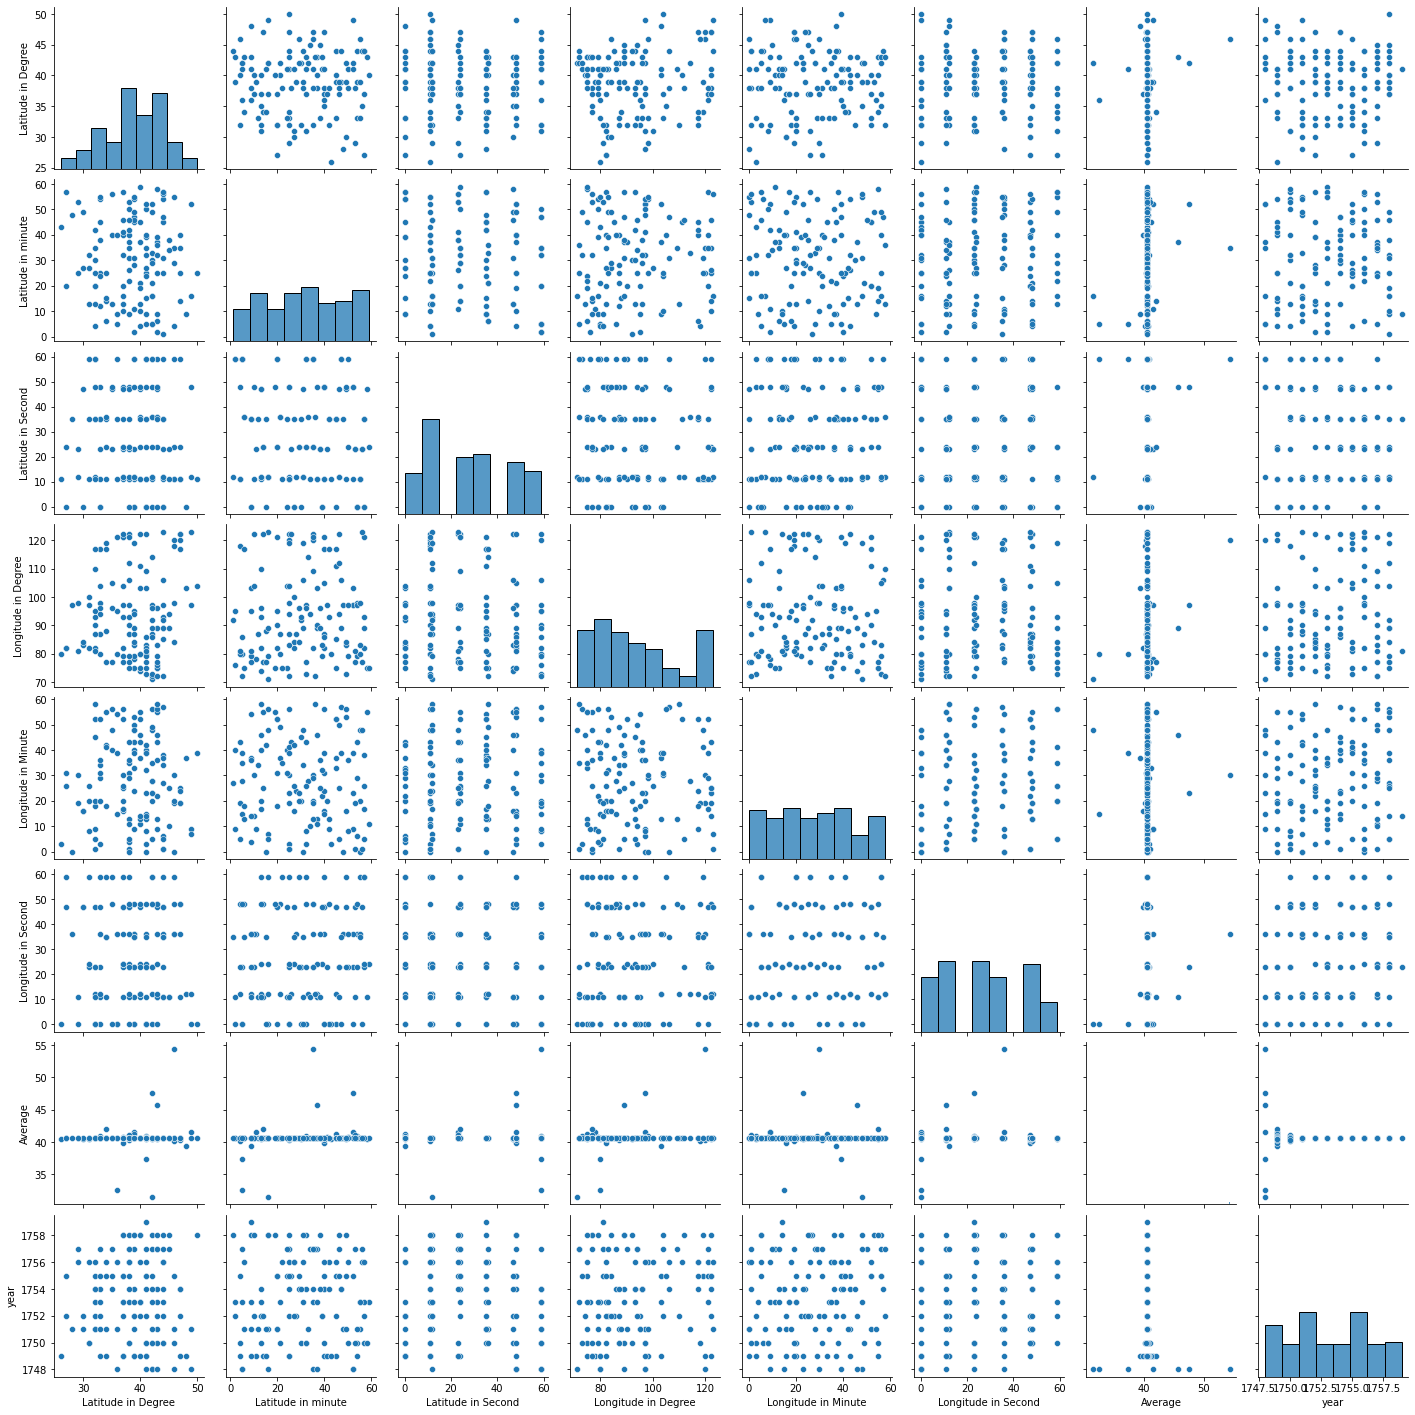

In [ ]:
sns.pairplot(df2)

In [ ]:
df.corr()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
Latitude in Degree,1.000000,-0.023909,-0.030451,0.105112,0.005194,-0.010825,0.096327,-0.019234
Latitude in minute,-0.023909,1.000000,-0.105866,0.068139,-0.053994,0.091066,0.181103,0.005292
Latitude in Second,-0.030451,-0.105866,1.000000,-0.043881,0.081674,-0.153521,0.109713,-0.084250
Longitude in Degree,0.105112,0.068139,-0.043881,1.000000,-0.044713,0.036515,0.180294,0.130440
Longitude in Minute,0.005194,-0.053994,0.081674,-0.044713,1.000000,0.067377,-0.008046,0.118990
Longitude in Second,-0.010825,0.091066,-0.153521,0.036515,0.067377,1.000000,0.113797,0.151608
Average,0.096327,0.181103,0.109713,0.180294,-0.008046,0.113797,1.000000,-0.053778
year,-0.019234,0.005292,-0.084250,0.130440,0.118990,0.151608,-0.053778,1.000000


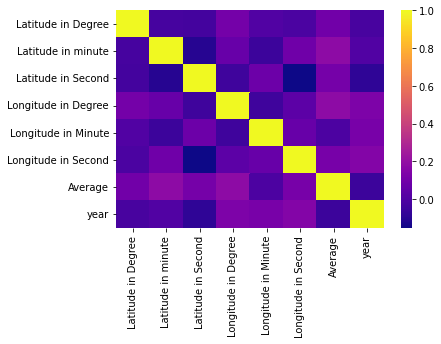

In [ ]:
c=df.corr()
sns.heatmap(c,yticklabels=True,cbar=True,cmap='plasma')

In [ ]:
df.describe()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.820312,30.765625,27.492188,93.250000,27.742188,26.960938,40.641785,1753.242188
std,5.200596,16.426158,18.977814,15.466499,16.927937,18.727807,1.834970,3.103836
min,26.000000,1.000000,0.000000,71.000000,0.000000,0.000000,31.500000,1748.000000
25%,35.000000,16.000000,11.000000,80.000000,14.000000,11.000000,40.579828,1751.000000
50%,39.000000,31.000000,24.000000,89.500000,26.500000,23.500000,40.581119,1753.000000
75%,42.250000,45.000000,47.000000,103.250000,40.250000,47.000000,40.582258,1756.000000
max,50.000000,59.000000,59.000000,123.000000,58.000000,59.000000,54.333333,1759.000000


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
x.head()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,41,5,59,80,39,0
1748-07-01,42,52,48,97,23,23
1748-08-01,46,35,59,120,30,36
1748-09-01,42,16,12,71,48,0
1748-10-01,43,37,48,89,46,11


In [ ]:
print(model.feature_importances_)

[0.19454871 0.12987617 0.11707936 0.24281061 0.16566153 0.15002362]


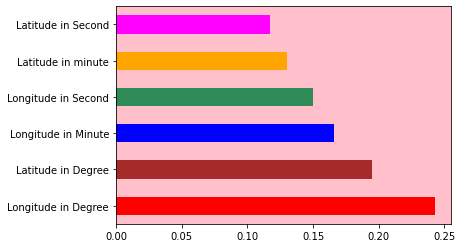

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
c=['red','brown','blue','seagreen','orange','magenta']
feat_importances.nlargest(6).plot(kind='barh',color=c)
ax=plt.axes()
ax.set_facecolor("pink")
plt.show()

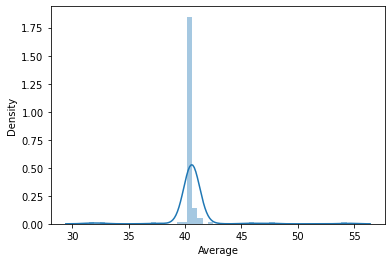

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([0.03055596, 0.02184618, 0.00123149, 0.00691909, 0.00223556,
       0.00499106])

In [ ]:
regressor.intercept_

37.845218098484196

In [ ]:
print("Coefficient of determinationn R^2 <-- on train set: {}".format(regressor.score(x_train,y_train)))

Coefficient of determinationn R^2 <-- on train set: 0.09732344120950742


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(x_test,y_test)))

Coefficient of determination R^2 <-- on test set: 0.04760004845976662


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [ ]:
score.mean()

-86896420.43803512

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Latitude in Degree,0.030556
Latitude in minute,0.021846
Latitude in Second,0.001231
Longitude in Degree,0.006919
Longitude in Minute,0.002236
Longitude in Second,0.004991


In [ ]:
prediction=regressor.predict(x_test)

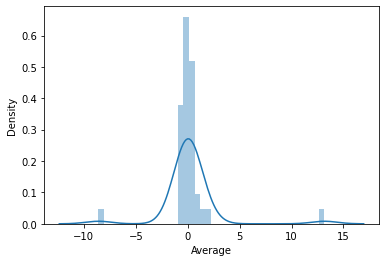

In [ ]:
sns.distplot(y_test-prediction)

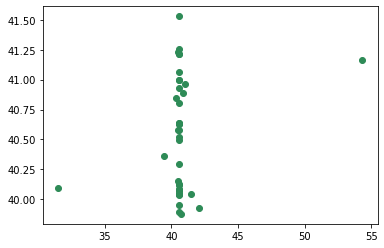

In [ ]:
plt.scatter(y_test,prediction,color='seagreen')

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0127781714544957
MSE: 6.721438773216321
RMSE: 2.5925737739197166


In [ ]:
import pickle

In [ ]:
file = open('regression_model.pkl','wb')
pickle.dump(regressor, file)

**Decision Tree Regressor**

In [ ]:

from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor(criterion="mse")

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse')

In [ ]:
print("Coefficient of determination R^2 <-- on train set:{}".format(dtree.score(x_train,y_train)))

Coefficient of determination R^2 <-- on train set:1.0


In [ ]:
print("Coefficient of determination R^2 <-- on train set:{}".format(dtree.score(x_test,y_test)))

Coefficient of determination R^2 <-- on train set:-0.09068753759965609


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(dtree,x,y,cv=5)

In [ ]:
score.mean()

-515418963.9264452

In [ ]:
from sklearn.tree import plot_tree

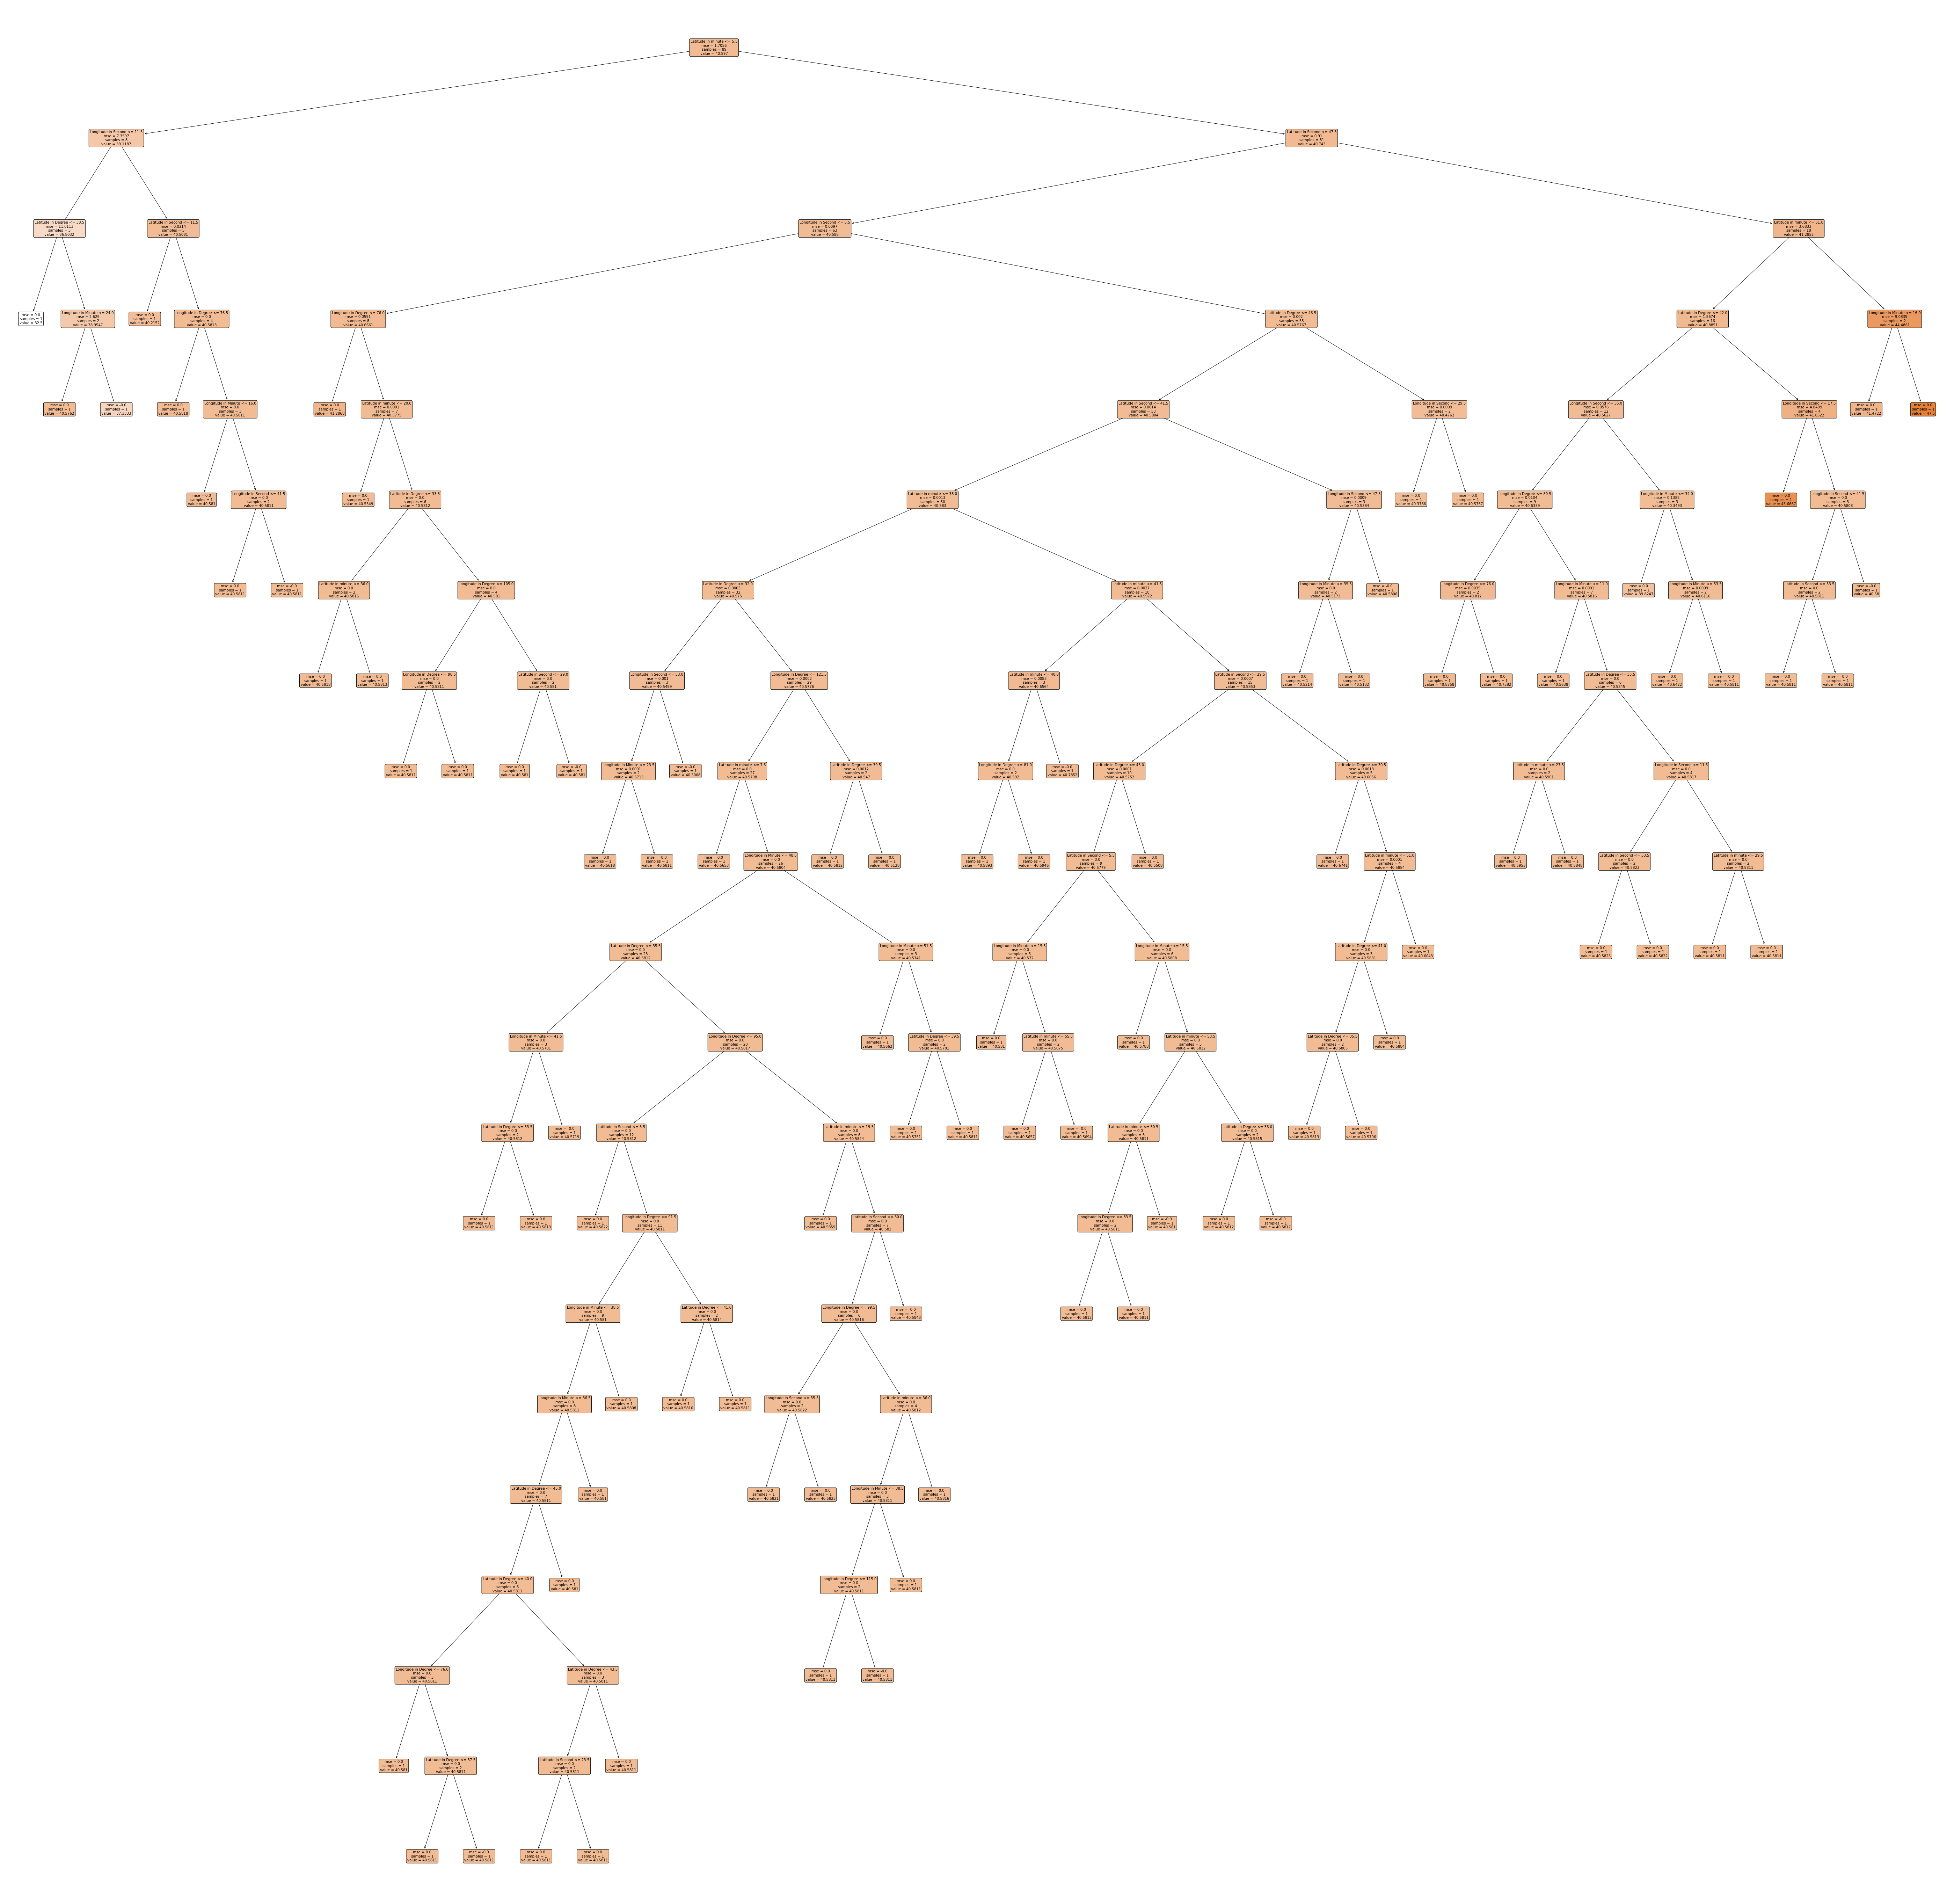

In [ ]:
plt.figure(figsize=(100,100))
decision_tree = plot_tree(decision_tree = dtree,feature_names = x.columns,precision=4,filled=True,rounded=True)

 **Model Evaluation**

In [ ]:
prediction = dtree.predict(x_test)

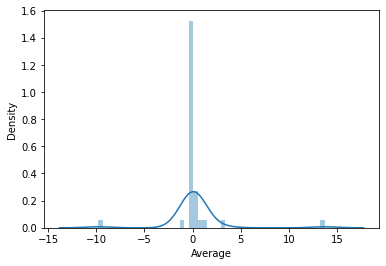

In [ ]:
sns.distplot(y_test-prediction)

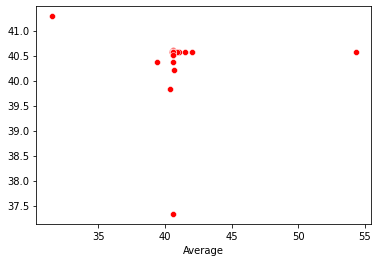

In [ ]:
sns.scatterplot(y_test,prediction,color='red')

**Hyperparameter Tuning**

In [ ]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
params={
    "splitter"  :  ["best", "random"],
    "max_depth":[2,3,5,7,9,10,12,15],
    "min_samples_leaf" :[1,2,3,4,5], 
    "min_weight_fraction_leaf" :[0.1,0.2,0.3,0.4],
    "max_features" : ["auto","log2","sqrt",None],
    "max_leaf_nodes" :[None,10,20,30,40,50,60,70]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [ ]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec = divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour,tmin,round(tsec,2)))

In [ ]:
from datetime import datetime
start_time = timer(None)
random_search.fit(x,y)
timer(start_time)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 6 minutes and 30.62 seconds.


In [ ]:
random_search.best_params_

{'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.3,
 'splitter': 'random'}

In [ ]:
random_search.best_score_

-3.2895051660388432

In [ ]:
predictions=random_search.predict(x_test)

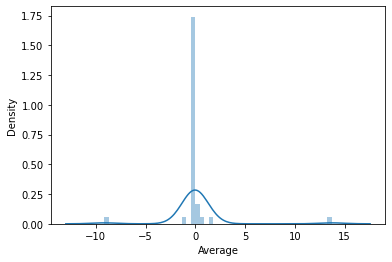

In [ ]:
sns.distplot(y_test-predictions)

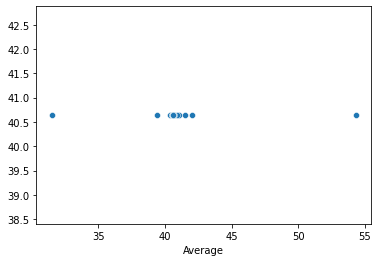

In [ ]:
sns.scatterplot(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7486624507912543
MSE: 7.067837307543554
RMSE: 2.6585404468511578


In [ ]:
file = open('decision_regression_model.pkl','wb')
pickle.dump(random_search, file)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(criterion="mse")

In [ ]:
reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mse')

In [ ]:
print("Coefficient of determination R^2 <-- on train set:{}".format(reg.score(x_train,y_train)))

Coefficient of determination R^2 <-- on train set:0.8636391503032944


In [ ]:
print("Coefficient of determination R^2 <-- on test set:{}".format(dtree.score(x_test,y_test)))

Coefficient of determination R^2 <-- on test set:-0.09068753759965609


In [ ]:
score=cross_val_score(reg,x,y,cv=5)

In [ ]:
score.mean()

-323514615.93775916

In [ ]:
prediction=reg.predict(x_test)

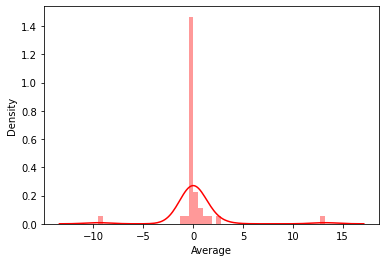

In [ ]:
sns.distplot(y_test-prediction,color='red')

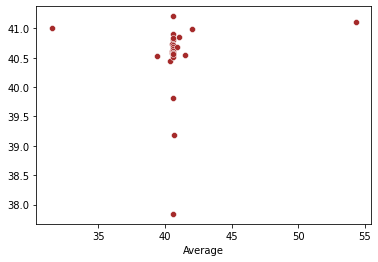

In [ ]:
sns.scatterplot(y_test,prediction,color='brown')

**Hyperparameter Tuning**

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=50,stop=130,num=25)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=10)]
min_samples_split=[3,8,10,25,50]
min_samples_leaf=[2,5,8,10]
bootstrap=[True,False]

In [ ]:
random_grid={
   "n_estimators":n_estimators,
   "max_depth":max_depth,
   "min_samples_split":min_samples_split, 
   "min_samples_leaf":min_samples_leaf,
   "max_features":max_features,
   "bootstrap":bootstrap,
}
print(random_grid)

{'n_estimators': [50, 53, 56, 60, 63, 66, 70, 73, 76, 80, 83, 86, 90, 93, 96, 100, 103, 106, 110, 113, 116, 120, 123, 126, 130], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [3, 8, 10, 25, 50], 'min_samples_leaf': [2, 5, 8, 10], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=130,cv=10,verbose=3,random_state=42)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 130 candidates, totalling 1300 fits
[CV 1/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-0.016 total time=   0.1s
[CV 2/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-0.110 total time=   0.1s
[CV 3/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-8.156 total time=   0.1s
[CV 4/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-8.787 total time=   0.1s
[CV 5/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-0.108 total time=   0.1s
[CV 6/10] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116;, score=-0.060 total time=   0.1s

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=130,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [3, 8, 10, 25, 50],
                                        'n_estimators': [50, 53, 56, 60, 63, 66,
                                                         70, 73, 76, 80, 83, 86,
                                                         90, 93, 96, 100, 103,
                                                         106, 110, 113, 116,
                                                         120, 123, 126, 130]},
                   random_state=42, scoring='neg_mean_squared_error',
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 90}

In [ ]:
rf_random.best_score_

-1.7621838456475019

In [ ]:
prediction = rf_random.predict(x_test)

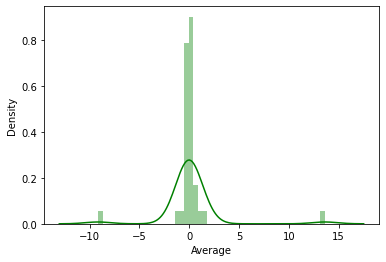

In [ ]:
sns.distplot(y_test-prediction,color='green')

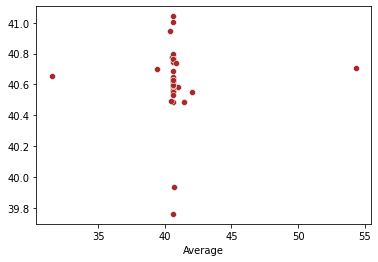

In [ ]:
sns.scatterplot(y_test,prediction,color='brown')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.8277318199699241
MSE: 7.099991333966261
RMSE: 2.6645808927420953


In [ ]:
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random, file)

**XgboostRegressor**

In [ ]:
import xgboost as xgb

In [ ]:
regressor=xgb.XGBRegressor()

In [ ]:
regressor.fit(x_train,y_train)

[16:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9667293358899864


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: -0.10598907340037922


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

[16:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
score.mean()

-191351398.95846096

In [ ]:
prediction=regressor.predict(x_test)

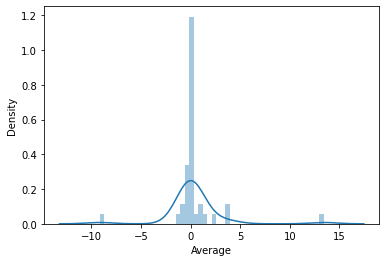

In [ ]:
sns.distplot(y_test-prediction)

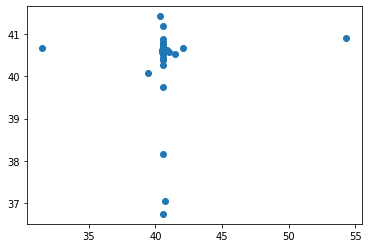

In [ ]:
plt.scatter(y_test,prediction)

**Hyperparameter Tuning**

In [ ]:
xgb.XGBRegressor()

XGBRegressor()

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=50,stop=130,num=25)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=10)]
min_samples_split=[3,8,10,25,50]
min_samples_leaf=[2,5,8,10]
bootstrap=[True,False]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,  
    'max_features':max_features,
    'bootstrap':bootstrap
    
}
print(random_grid)

{'n_estimators': [50, 53, 56, 60, 63, 66, 70, 73, 76, 80, 83, 86, 90, 93, 96, 100, 103, 106, 110, 113, 116, 120, 123, 126, 130], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [3, 8, 10, 25, 50], 'min_samples_leaf': [2, 5, 8, 10], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [ ]:
regressor=xgb.XGBRegressor()

In [ ]:
xg_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=130,cv=5,verbose=2,random_state=42)

In [ ]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits
[16:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.0s
[16:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.0s
[16:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.0s
[16:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=130,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [3, 8, 10, 25, 50],
                                        'n_estimators': [50, 53, 56, 60, 63, 66,
                                                         70, 73, 76, 80, 83, 86,
                                                         90, 93, 96, 100, 103,
                                                         106, 110, 113, 116,
                                                         120, 123, 126, 130]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbos

In [ ]:
xg_random.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 50}

In [ ]:
xg_random.best_score_

-3.041562424314666

In [ ]:
predictions=xg_random.predict(x_test)

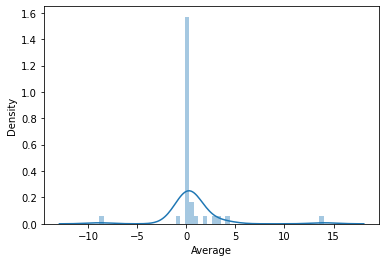

In [ ]:
sns.distplot(y_test-predictions)

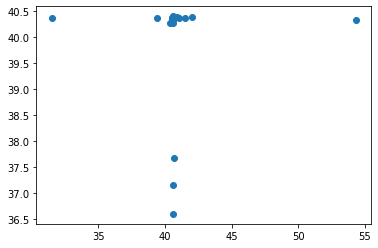

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1303401834372497
MSE: 8.158338875248292
RMSE: 2.85628060163008


In [ ]:
import pickle 

In [ ]:
file = open('xgboost_regression_model.pkl', 'wb')

pickle.dump(xg_random, file)

In [ ]:
latest_df=df.loc['1754':'1759']
latest_df.head()

,Latitude in Degree,Latitude in minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,year
date,,,,,,,,,,,,
1754-01-01,39,47,59,"""N""",89,39,0,"""W""","""Springfield""",IL,40.582213,1754
1754-02-01,47,40,11,"""N""",117,24,36,"""W""","""Spokane""",WA,40.582497,1754
1754-03-01,41,40,48,"""N""",86,15,0,"""W""","""South Bend""",IN,40.582475,1754
1754-04-01,43,32,24,"""N""",96,43,48,"""W""","""Sioux Falls""",SD,40.582339,1754
1754-05-01,42,29,24,"""N""",96,23,23,"""W""","""Sioux City""",IA,40.582072,1754


In [ ]:
latest_df.describe()

,Latitude in Degree,Latitude in minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,38.786885,31.770492,27.196721,96.786885,30.573770,29.360656,40.581162,1756.049180
std,4.936648,14.228368,16.265321,16.143228,17.533263,19.517542,0.000477,1.465449
min,27.000000,1.000000,0.000000,72.000000,0.000000,0.000000,40.579626,1754.000000
25%,35.000000,24.000000,12.000000,83.000000,15.000000,11.000000,40.581076,1755.000000
50%,39.000000,32.000000,24.000000,94.000000,31.000000,24.000000,40.581115,1756.000000
75%,42.000000,42.000000,36.000000,111.000000,43.000000,47.000000,40.581214,1757.000000
max,50.000000,57.000000,59.000000,123.000000,58.000000,59.000000,40.582497,1759.000000


In [ ]:
latest_df[['City','Average']].groupby(['City']).mean().sort_values('Average')

,Average
City,
"""Sedalia""",40.579626
"""Selma""",40.579895
"""Seattle""",40.580036
"""Seminole""",40.580582
"""Scranton""",40.580765
"""Salida""",40.580962
"""Salina""",40.580968
"""Scottsbluff""",40.580968
"""Salem""",40.580977


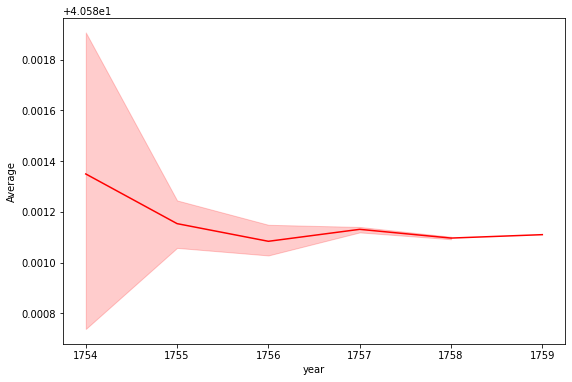

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x='year',y='Average',data=latest_df,color='red')

In [ ]:
resample_df=latest_df[['Average']].resample('A').mean()
resample_df.head()

,Average
date,
1754-12-31,40.581350
1755-12-31,40.581154
1756-12-31,40.581084
1757-12-31,40.581131
1758-12-31,40.581097


In [ ]:
df[['City','Average']].groupby(['City']).mean().sort_values('Average')

,Average
City,
"""Worcester""",31.500000
"""Winston-Salem""",32.500000
"""Youngstown""",37.333333
"""Williston""",39.423064
"""Williamson""",39.824683
...,...
"""Winnipeg""",41.472222
"""Wilmington""",41.675170
"""Wisconsin Dells""",45.666667


findfont: Font family ['FANTACY'] not found. Falling back to DejaVu Sans.


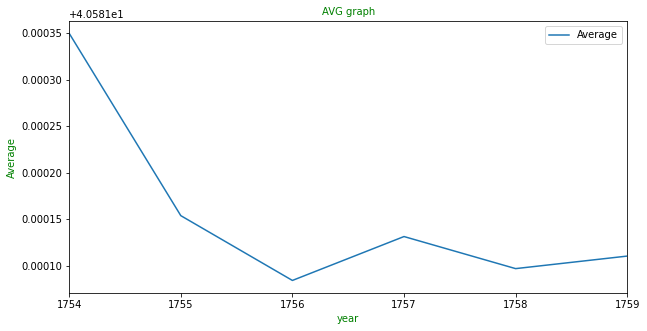

In [ ]:
resample_df.plot(figsize=(10,5))
font={'family':'FANTACY','color':'green','size':10} 
plt.xlabel('year',font)
plt.ylabel('Average',font)
plt.title('AVG graph',font)
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Ducky Fuller Test Results')
test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index =['Test statistic','p-value','Lags Used','Number of Observation used'])
for key,value in test_df[4].items():
  df_output['Critical value (%s)'%key] = value
print(df_output)

Ducky Fuller Test Results
Test statistic               -7.106106e+00
p-value                       4.049884e-10
Lags Used                     0.000000e+00
Number of Observation used    5.000000e+00
Critical value (1%)          -6.045114e+00
Critical value (5%)          -3.929280e+00
Critical value (10%)         -2.986810e+00
dtype: float64


In [ ]:
#As test statistic has greater value than critical values.So,we can say that time series is not stationary.

In [ ]:
#Now we decompose the data

<Figure size 432x360 with 0 Axes>

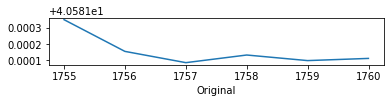

<Figure size 432x360 with 0 Axes>

In [ ]:
decomp = seasonal_decompose(resample_df,freq = 3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

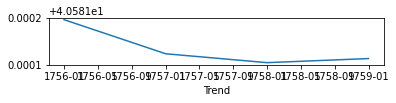

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))


<Figure size 432x360 with 0 Axes>

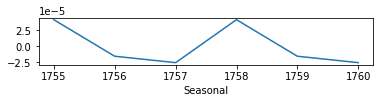

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

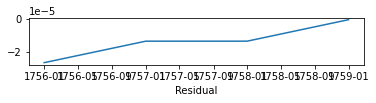

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))


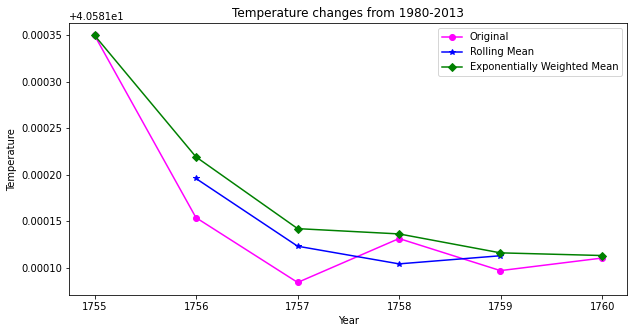

In [ ]:
rol_mean = resample_df.rolling(window=3,center = True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3,center=True).std()
fig,(ax1) = plt.subplots(figsize=(10,5))
ax1.plot(resample_df,label='Original',color='magenta',marker='o')
ax1.plot(rol_mean,label='Rolling Mean',color='blue',marker='*')
ax1.plot(ewm, label='Exponentially Weighted Mean',color='green',marker='D')
ax1.set_title('Temperature changes from 1980-2013',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=10)
ax1.set_xlabel('Year',fontsize=10)
ax1.legend()

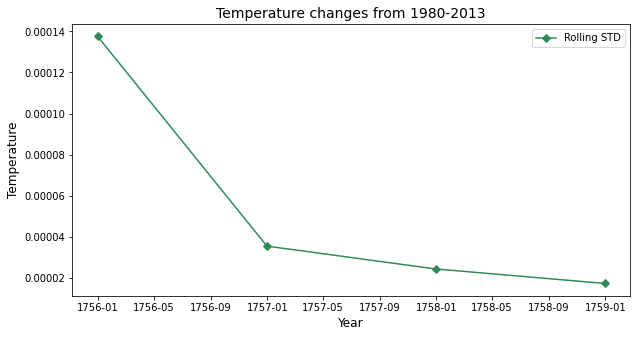

In [ ]:
fig,(ax2) = plt.subplots(figsize=(10,5))
ax2.plot(rol_std,label='Rolling STD',color='seagreen',marker='D')
ax2.set_title('Temperature changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

In [ ]:
#Above graph shows rolling mean,rolling standard deviation and ewm

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print('Ducky-fuller test for rolling mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of observations used'])
for Key,value in df_test[4].items():
    df_output['Critical value(%s)'%key] = value
print(df_output)
print('')
print('Duckey-fuller test for the Exponentially weighted mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of observations used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Ducky-fuller test for rolling mean:
Test Statistic                -6.916875e+00
p-value                        1.173323e-09
Lags Used                      0.000000e+00
Number of observations used    3.000000e+00
Critical value(10%)           -3.391681e+00
dtype: float64

Duckey-fuller test for the Exponentially weighted mean:
Test Statistic                -5.437440
p-value                        0.000003
Lags Used                      1.000000
Number of observations used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [ ]:
#Above we notised that both Test Statistics are greater than Critical value,
#So,We have failed to reject Null hypothesis

In [ ]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Average
date,
1755-12-31,-0.000042
1756-12-31,-0.000039
1757-12-31,0.000027
1758-12-31,-0.000016


In [ ]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Average
date,
1754-12-31,0.000000
1755-12-31,-0.000065
1756-12-31,-0.000058
1757-12-31,-0.000005
1758-12-31,-0.000019


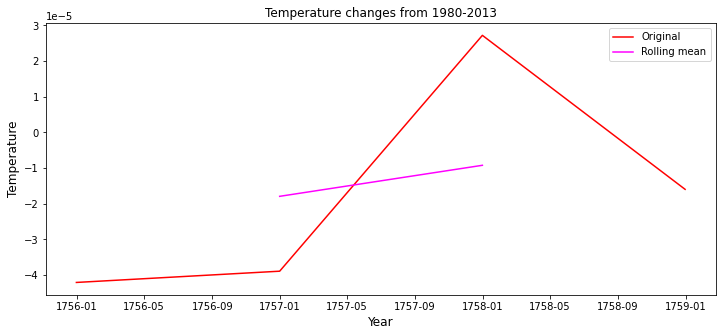

In [ ]:

df_roll_mean_diff = diff_rol_mean.rolling(window=3,center = True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig,(ax1) = plt.subplots(figsize=(12,5))
ax1.plot(diff_rol_mean,label='Original',color='red')
ax1.plot(df_roll_mean_diff,label='Rolling mean',color='magenta')
ax1.set_title('Temperature changes from 1980-2013',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

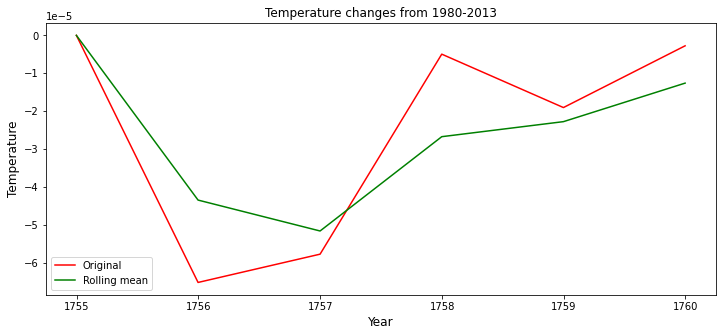

In [ ]:
fig,(ax2) = plt.subplots(figsize=(12,5))
ax2.plot(diff_ewm,label='Original',color='red')
ax2.plot(df_ewm_diff,label='Rolling mean',color='green')
ax2.set_title('Temperature changes from 1980-2013',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

In [ ]:
print('Ducky fuller test for the difference between the original and rolling mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag = 'AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test statistics','p-value','lags used','Number of observation used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
print('')
print('Duckey fuller for the difference between original and exponentially weighted mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','Number of observation used'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Ducky fuller test for the difference between the original and rolling mean:
Test statistics               -1.311073
p-value                        0.624091
lags used                      0.000000
Number of observation used     3.000000
Critical Value (1%)          -10.417191
Critical Value (5%)           -5.778381
Critical Value (10%)          -3.391681
dtype: float64

Duckey fuller for the difference between original and exponentially weighted mean:
Test Statistics              -1.871124
p-value                       0.345765
lags used                     0.000000
Number of observation used    5.000000
Critical value (1%)          -6.045114
Critical value (5%)          -3.929280
Critical value (10%)         -2.986810
dtype: float64


In [ ]:
#Above we notisted that Test Statistic is less than Critical value
#So,we can reject null hypothesis and we can confidently say that Data is Stationary.

In [ ]:
# for finding p and q parameters we are going to use autocorrelation and partial autocorrelation

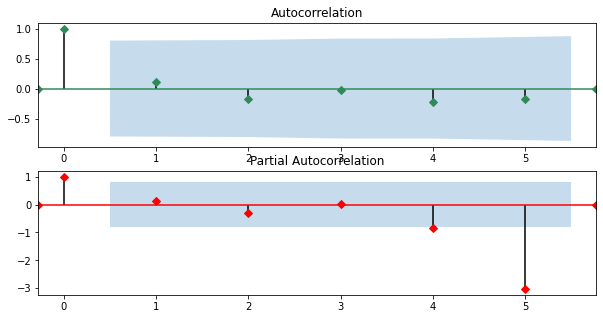

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca(),color='seagreen',marker='D')
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca(),color='red',marker='D')
pyplot.show()
